In [ ]:
%matplotlib inline


# Tracé des courbes de validation

Ce graphique montre les scores d'apprentissage et de validation d'un SVM pour différentes valeurs du paramètre de noyau gamma. Pour des valeurs très faibles de gamma, vous pouvez constater que les scores d'apprentissage et de validation sont tous deux faibles. C'est ce qu'on appelle un sous-ajustement. Des valeurs moyennes de gamma se traduisent par des valeurs élevées pour les deux scores, ce qui signifie que le classificateur est assez performant. Si gamma est trop élevé, le classificateur sera surajusté, ce qui signifie que le score d'apprentissage est bon mais que le score de validation est faible.


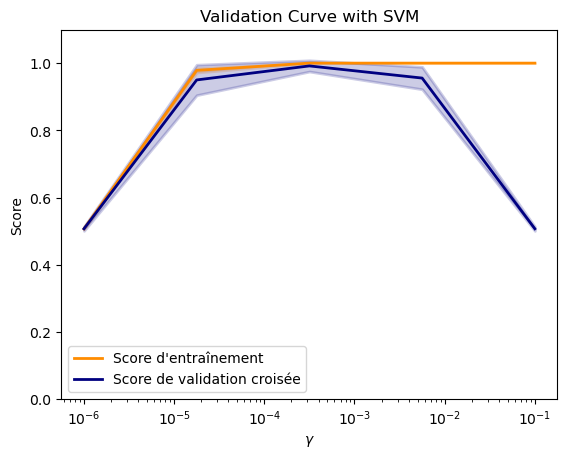

In [3]:
import matplotlib.pyplot as plt #Pour la visualisation des résultat
import numpy as np              #Pour les calculs mathématiques


from sklearn.datasets import load_digits  # pour charger l'ensemble de données des chiffres manuscrits
from sklearn.svm import SVC      #SVC pour le modele SVM et validation courve de skelearn 
from sklearn.model_selection import validation_curve   #pour la validation des courbe

#On a un problème de classification binaires
#Les données sont chargées à partir de load_digits

X, y = load_digits(return_X_y=True)
subset_mask = np.isin(y, [1, 2])  # pour obtenir un problème de classification binaire. (1 vs 2)
X, y = X[subset_mask], y[subset_mask]


#La plage des valeurs de paramètre "gamma" est définie 
#à l'aide de np.logspace. "gamma" est
#un paramètre du modèle SVM qui contrôle la flexibilité du modèle.

param_range = np.logspace(-6, -1, 5)

#!!La fonction validation_curve est utilisée pour générer 
#les scores d'entraînement et de
#validation pour différentes valeurs de "gamma".

train_scores, test_scores = validation_curve(
    SVC(),
    X,
    y,
    param_name="gamma",
    param_range=param_range,
    scoring="accuracy",
    n_jobs=2,
)

#Les scores d'entraînement et de validation moyens sont 
#calculés à partir des résultats de validation_curve,
#ainsi que les écarts types correspondants.


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
#représentant les valeurs de paramètre gamma) et "Score"
plt.ylabel("Score")
#les limites des axes y sont ficée entre 0.0 et 1.1
plt.ylim(0.0, 1.1)
lw = 2


#La courbe de validation est tracée en utilisant plt.semilogx,
#qui affiche les scores d'entraînement moyens en fonction 
#des valeurs de paramètre "gamma". La courbe est affichée 
#en couleur orange foncé et étiquetée comme "Training score".


plt.semilogx(
    param_range, train_scores_mean, label="Score d'entraînement", color="darkorange", lw=lw
)


plt.fill_between(
    param_range,
    #La plage entre les scores d'entraînement moyens moins l'écart type
    train_scores_mean - train_scores_std,
    #les scores d'entraînement moyens plus l'écart type 
    train_scores_mean + train_scores_std,
    #remplie avec une couleur orange plus claire pour représenter la variation de la performance du modèle.
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
#La même procédure est répétée pour la courbe de validation en utilisant les 2)scores de validation.
plt.semilogx(
    param_range, test_scores_mean, label="Score de validation croisée", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
# le graphique est affiché à l'aide de plt.show().
plt.show()